In [1]:
import os          
import cv2
import netron
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import tensorflow as tf
from matplotlib import pyplot
from datetime import datetime      
import matplotlib.pyplot as plt 
#from ann_visualizer.visualize import ann_viz
from sklearn.metrics import confusion_matrix
import sklearn.model_selection as model_selection

%load_ext tensorboard
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


2022-12-27 21:37:20.920371: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-27 21:37:21.267442: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ragu/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:/usr/lib/x86_64-linux-gnu:
2022-12-27 21:37:21.267470: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-27 21:37:22.400725: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic librar

In [2]:
def load_data(dataset):
    class_names = []
    images = []
    labels = []  
    for folder in os.listdir(dataset):
        class_names.append(folder)    
    class_names_label = {class_name:i for i, class_name in enumerate(class_names)} 
    print("Loading Dataset {}".format(dataset))
    for folder in os.listdir(dataset):
        label = class_names_label[folder]
        for file in tqdm(os.listdir(os.path.join(dataset, folder))):
            img_path = os.path.join(os.path.join(dataset, folder), file)
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            IMAGE_SIZE = (150, 150)
            image = cv2.resize(image, IMAGE_SIZE)
            images.append(image)
            labels.append(label)
    return images, labels , class_names

In [3]:
dataset = '/home/ragu/GIT/dataset'
images, labels, class_names = load_data(dataset)

Loading Dataset /home/ragu/GIT/dataset


100%|█████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 54.10it/s]


In [4]:
images = np.array(images, dtype = 'float32')
labels = np.array(labels, dtype = 'int32') 

In [5]:
images = images/255.0

In [6]:
train_images, test_images, train_labels, test_labels = model_selection.train_test_split(images, labels, train_size=0.80,test_size=0.20, random_state=101) 

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(30, activation=tf.nn.softmax)
])

2022-12-27 21:37:53.837747: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ragu/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:/usr/lib/x86_64-linux-gnu:
2022-12-27 21:37:53.837960: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-27 21:37:53.837977: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ROG): /proc/driver/nvidia/version does not exist
2022-12-27 21:37:53.838524: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with th

In [8]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(train_images, train_labels, batch_size=128, epochs = 5, validation_split = 0.2,callbacks=[tensorboard_callback])

Epoch 1/5


2022-12-27 21:37:53.971314: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 258660000 exceeds 10% of free system memory.
2022-12-27 21:37:55.127079: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 717750272 exceeds 10% of free system memory.
2022-12-27 21:37:55.388827: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 349241344 exceeds 10% of free system memory.
2022-12-27 21:37:55.741242: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 87310336 exceeds 10% of free system memory.
2022-12-27 21:37:55.798545: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 82591744 exceeds 10% of free system memory.


8/8 [==============================] - 46s 5s/step - loss: 3.3950 - accuracy: 0.0595 - val_loss: 3.3629 - val_accuracy: 0.1167
Epoch 2/5
8/8 [==============================] - 43s 5s/step - loss: 2.8629 - accuracy: 0.2401 - val_loss: 1.9981 - val_accuracy: 0.4625
Epoch 3/5
8/8 [==============================] - 44s 5s/step - loss: 1.6542 - accuracy: 0.5209 - val_loss: 1.9223 - val_accuracy: 0.4542
Epoch 4/5
8/8 [==============================] - 43s 5s/step - loss: 1.2841 - accuracy: 0.6242 - val_loss: 1.4234 - val_accuracy: 0.5667
Epoch 5/5
8/8 [==============================] - 45s 6s/step - loss: 0.9426 - accuracy: 0.7192 - val_loss: 1.2984 - val_accuracy: 0.6042


In [13]:
model.evaluate(test_images, test_labels)

10/10 [==============================] - 2s 162ms/step - loss: 1.6042 - accuracy: 0.5133


[1.6042122840881348, 0.5133333206176758]

In [14]:
def plot_accuracy_loss(history):
    y = ['accuracy','loss']
    for x in y:
        plt.plot(history.history[x],color='orange', label = x )
        plt.plot(history.history['val_'+x], color='lime', label ='val_'+x)
        plt.title("train_"+x + " vs val_"+x)
        plt.ylabel(x)
        plt.xlabel("epochs")
        plt.legend()
        plt.show()

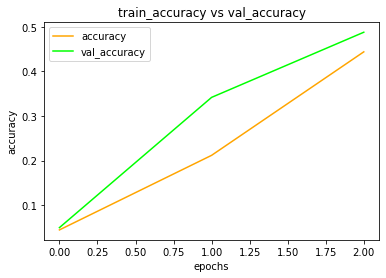

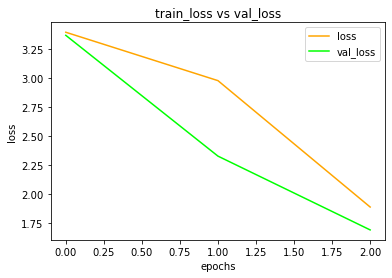

In [15]:
plot_accuracy_loss(history)

10/10 [==============================] - 2s 214ms/step


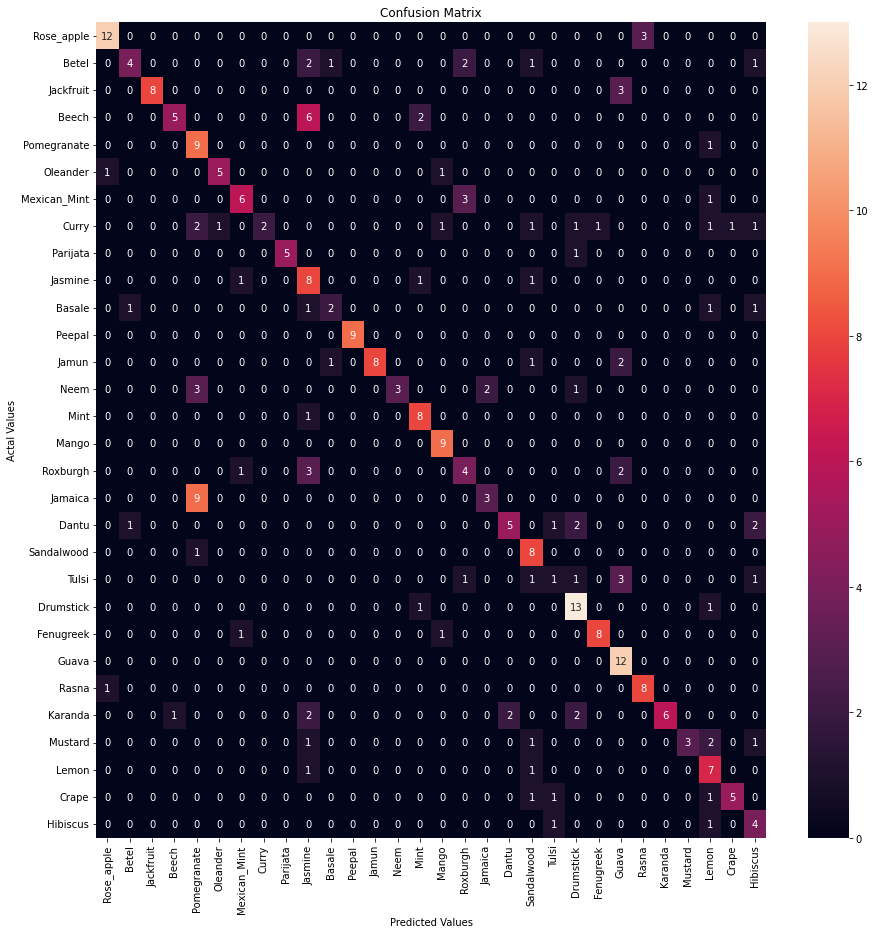

In [51]:
def measures(y_actual, y_pred):
    confusion_matrix_df = pd.DataFrame(confusion_matrix(actual,predictions),index = class_names, columns =class_names)

    FP = confusion_matrix_df.sum(axis=0) - np.diag(confusion_matrix_df) 
    FN = confusion_matrix_df.sum(axis=1) - np.diag(confusion_matrix_df)
    TP = np.diag(confusion_matrix_df)
    TN = confusion_matrix_df.sum() - (FP + FN + TP)
    NPV = TN/(TN+FN)
    FDR = FP/(TP+FP)
    FNR = FP/(FP+TN)
    Accuracy = (TP + TN) / (TP + FP + FN + TN)
    Error_rate = (FP + FN) / (TP + FP + FN + TN)
    Precision = TP / (TP + FP)
    Recall = TP / (TP + FN )
    F_measure = (2 * Recall * Precision) / (Recall + Precision)
    FPR = FN/(TP+FN)
    Specificity = TN/(TN+FP)
    
    dict = {}
    dict['class_name'] = class_names
    dict['TP'] = TP
    dict['FP'] = FP
    dict['TN'] = TN
    dict['FN'] = FN
    dict['Accuracy'] = Accuracy
    dict['Precision'] = Precision
    dict['Recall'] = Recall
    dict['F_measure'] = F_measure
    dict['Error_rate'] = Error_rate
    dict['Specificity'] = Specificity
    dict['FNR'] = FNR
    dict['FPR'] = FPR
    measures = pd.DataFrame(dict)
    # Specify the values for the new row
    new_row = {'class_name': 'Average', 'TP':np.round(np.average(TP),2), 
               'FP': np.round(np.average(FP),2), 'TN': np.round( np.average(TN),2), 
               'FN': np.round(np.average(FN),2), 'Accuracy': np.round(np.average(Accuracy),2), 'Precision': np.round(np.average(Precision),2),
               'Recall': np.round(np.average(Recall),2), 'F_measure': np.round(np.average(F_measure),2), 
               'Error_rate': np.round( np.average(Error_rate),2), 'Specificity':  np.round( np.average(Specificity),2), 'FNR': np.round( np.average(FNR),2), 'FPR': np.round(np.average(FPR),2)}

# Insert the new row into the DataFrame
    measures.loc['Average'] = new_row

  
    plt.figure(figsize=(15,15))
    sns.heatmap(confusion_matrix_df, annot=True)
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()
                                
    
    # Save measures to a CSV file
    measures.to_csv("measures.csv", index=False)
    return measures
    
predictions = np.argmax(model.predict(test_images), axis = 1)
actual = test_labels
measures = measures(actual, predictions)


In [52]:
measures

,class_name,TP,FP,TN,FN,Accuracy,Precision,Recall,F_measure,Error_rate,Specificity,FNR,FPR
Rose_apple,Rose_apple,12.00,2.00,-3.00,3.00,0.642857,0.857143,0.800000,0.827586,0.357143,3.000000,-2.000000,0.200000
Betel,Betel,4.00,2.00,-7.00,7.00,-0.500000,0.666667,0.363636,0.470588,1.500000,1.400000,-0.400000,0.636364
Jackfruit,Jackfruit,8.00,0.00,-3.00,3.00,0.625000,1.000000,0.727273,0.842105,0.375000,1.000000,-0.000000,0.272727
Beech,Beech,5.00,1.00,-8.00,8.00,-0.500000,0.833333,0.384615,0.526316,1.500000,1.142857,-0.142857,0.615385
Pomegranate,Pomegranate,9.00,15.00,-1.00,1.00,0.333333,0.375000,0.900000,0.529412,0.666667,-0.071429,1.071429,0.100000
Oleander,Oleander,5.00,1.00,-2.00,2.00,0.500000,0.833333,0.714286,0.769231,0.500000,2.000000,-1.000000,0.285714
Mexican_Mint,Mexican_Mint,6.00,3.00,-4.00,4.00,0.222222,0.666667,0.600000,0.631579,0.777778,4.000000,-3.000000,0.400000
Curry,Curry,2.00,0.00,-10.00,10.00,-4.000000,1.000000,0.166667,0.285714,5.000000,1.000000,-0.000000,0.833333
Parijata,Parijata,5.00,0.00,-1.00,1.00,0.800000,1.000000,0.833333,0.909091,0.200000,1.000000,-0.000000,0.166667
Jasmine,Jasmine,8.00,17.00,-3.00,3.00,0.200000,0.320000,0.727273,0.444444,0.800000,-0.214286,1.214286,0.272727


In [ ]:
model.summary()

In [ ]:
import visualkeras
visualkeras.layered_view(model, legend=True) 


In [ ]:
dot_img_file = 'model.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [ ]:
logs_base_dir = "./logs"
os.makedirs(logs_base_dir, exist_ok=True)
%tensorboard --logdir {logs_base_dir}

In [ ]:
ann_viz(model, title="RRNET8")

In [ ]:
model_name = 'RRNET8.h5'
model.save(model_name)
netron.start(model_name, 8081)

In [ ]:
for layer in model.layers:
    
    if 'conv' not in layer.name:
        continue    
    filters , bias = layer.get_weights()
    print(layer.name , filters.shape)

In [ ]:
weights = model.get_layer("conv2d").get_weights()[1]
plt.figure(figsize=(15,7))
sns.barplot(x=np.arange(len(weights)), y=weights)
plt.show()

In [ ]:
bias = model.get_layer("dense").get_weights()[1]
plt.figure(figsize=(15,7))
sns.barplot(x=np.arange(len(bias)), y=bias)
plt.show()

In [ ]:
weights = model.get_layer('dense_1').get_weights()[0]
sns.distplot(weights)
plt.show()

In [ ]:
feature_maps = tf.keras.models.Model(model.input, model.get_layer('conv2d').output)
feature_maps.summary()

In [ ]:
filters , bias = model.layers[1].get_weights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
n_filters =6
ix=1
fig = pyplot.figure(figsize=(20,15))
for i in range(n_filters):
    
    f = filters[:,:,:,i]
    for j in range(3):
       
        pyplot.subplot(n_filters,3,ix)
        pyplot.imshow(f[:,:,j] ,cmap='gray')
        ix+=1

pyplot.show()

In [ ]:

blocks = [ ] 
for i in range(len(model.layers)):
    layer = model.layers[i]
    if 'conv' not in layer.name:
        continue    
    print(i , layer.name , layer.output.shape)
    blocks.append(i)

In [ ]:
outputs = [model.layers[i].output for i in blocks]

model = tf.keras.models.Model( inputs= model.inputs, outputs = outputs)

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import  img_to_array 
from matplotlib import pyplot
from numpy import expand_dims

model = VGG16()

model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()

img = load_img('bird.jpg', target_size=(224, 224))

img = img_to_array(img)

img = expand_dims(img, axis=0)

img = preprocess_input(img)

feature_maps = model.predict(img)

square = 8
ix = 1
for _ in range(square):

 ax = pyplot.subplot(square, square, ix)
 ax.set_xticks([])
 ax.set_yticks([])

 pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
 ix += 1

pyplot.show()

In [ ]:
https://data.world/datasets/dna